## SAP BLUEPRINT EMAIL CLASSIFICATION ##

 In this projcet I am going to used SAP Blueprint Archived emails to trained our model in process to predict the class
 of that email. Like we can predict the class in this case module of this email eg. CPL and BW.
 For the model simplicity currently I am usig only two modules Archived emails to trainded our model.
 
 

#### Importing  needed libraries and packages.####

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

Exported all SAP Blueprint archive email into Excel file name CPL_BW.xlsx in local machine.

In [201]:
# Read excel file CPL_BW into Pandas DataFrame name df_CB
df_CB=pd.read_excel("C:\\Users\\quashain.khan\\Desktop\\CPL_BW.xlsx")

In [202]:
# View top 5 eamil from df_CB data frame
df_CB.head()

,Subject,Body,Label,Substring
0,RE: CAL1616114: URGENT: PB7 Access Not Visible,\n\n\n\n \n\nUser Access Request Process\n\n ...,BW,Subject: Your Blueprint PB7 Account is Inactiv...
1,SAP Crystal.PNG,NaN,BW,NaN
2,SAP PB7 DSO Failure in SNAP,"Hi All,\r\n \r\nIt’s an high escalation Issue,...",BW,"Hi All,\r\n \r\nIt’s an high escalation Issue,..."
3,Blueprint CAB 15th September 2018 Monthly Bund...,"Since 13th September is SBO holiday, Final CAB...",BW,"Since 13th September is SBO holiday, Final CAB..."
4,OpenText - Hyper Care Daily Call ( Scanning an...,"Hi All,\r\n \r\nBlocking your time to discuss ...",BW,"Hi All,\r\n \r\nBlocking your time to discuss ..."


In [203]:
#View bottom 5 email from df_CB data Frame
df_CB.tail(5)

,Subject,Body,Label,Substring
9246,Arrow : SAP P16 Update on ETA 4513353273 - PO...,"Hi Team,\r\n\r\n \r\n\r\nPer this email trail,...",CPL,Subject: [EXTERNAL] Update on ETA 4513353273\r...
9247,Brainware: Batches in Error,Hi MYSAP1- please create ticket for :\r\n\r\nS...,CPL,Hi MYSAP1- please create ticket for :\r\n\r\nS...
9248,Brainware: Batch in Error,Hi MYSAP1- please create ticket for :\r\n\r\nS...,CPL,Hi MYSAP1- please create ticket for :\r\n\r\nS...
9249,"RE: WEB FORM - R3/BW - Walker, James (AUJWAH)","Hi, BP support.\r\n\r\n \r\n\r\nCan you please...",CPL,"Subject: WEB FORM - R3/BW - Walker, James (AUJ..."
9250,[Production] Notice - PI --> BizTalk --> SAP e...,"Dear User/Team,\r\n\r\nPlease find below the d...",CPL,"Dear User/Team,\r\n\r\nPlease find below the d..."


In [204]:
#df_DB data frame information about number of columns and their data type
df_CB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9251 entries, 0 to 9250
Data columns (total 4 columns):
Subject      8760 non-null object
Body         8977 non-null object
Label        8780 non-null object
Substring    8507 non-null object
dtypes: object(4)
memory usage: 289.2+ KB


In [205]:
# View name of features/columns .
df_CB.columns

Index(['Subject', 'Body', 'Label', 'Substring'], dtype='object')

In [206]:
# Since we need email body and class columns for model building, so we may drop rest columns.
df_CB.drop(['Subject', 'Body'],axis = 1,inplace=True)

In [207]:
#Rename the email Label with Label and Body with text
df_CB=df_CB.rename(columns={'Label':"class",'Substring':"text"})

In [208]:
# View top 5 rows from df_CB data frame after renaming features.
df_CB.head()

,class,text
0,BW,Subject: Your Blueprint PB7 Account is Inactiv...
1,BW,NaN
2,BW,"Hi All,\r\n \r\nIt’s an high escalation Issue,..."
3,BW,"Since 13th September is SBO holiday, Final CAB..."
4,BW,"Hi All,\r\n \r\nBlocking your time to discuss ..."


In [209]:
# Count words length of each rows here each row represent unique email 
df_CB['word_len']=df_CB['text'].apply(lambda x: len(str(x).split(' ')))

In [210]:
df_CB.head()

,class,text,word_len
0,BW,Subject: Your Blueprint PB7 Account is Inactiv...,106
1,BW,NaN,1
2,BW,"Hi All,\r\n \r\nIt’s an high escalation Issue,...",299
3,BW,"Since 13th September is SBO holiday, Final CAB...",159
4,BW,"Hi All,\r\n \r\nBlocking your time to discuss ...",99


In [211]:
# Count number of chacracters exist in each email or row
df_CB['char_len']=df_CB['text'].str.len()

In [212]:
df_CB.head()

,class,text,word_len,char_len
0,BW,Subject: Your Blueprint PB7 Account is Inactiv...,106,670.0
1,BW,NaN,1,NaN
2,BW,"Hi All,\r\n \r\nIt’s an high escalation Issue,...",299,1888.0
3,BW,"Since 13th September is SBO holiday, Final CAB...",159,1114.0
4,BW,"Hi All,\r\n \r\nBlocking your time to discuss ...",99,780.0


In [213]:
# Count the number of null ,Nan , blank values exist in class column.
len(df_CB[df_CB['class'].isnull()])

471

In [214]:
#Count the number of null ,Nan , blank values exist in email body (text)column.
len(df_CB[df_CB['text'].isnull()])

744

In [215]:
#We should drop all null values from the DataFrame in process to maintianed data consistency from row.
df_CB.dropna(inplace=True)

In [216]:
df_CB.head()

,class,text,word_len,char_len
0,BW,Subject: Your Blueprint PB7 Account is Inactiv...,106,670.0
2,BW,"Hi All,\r\n \r\nIt’s an high escalation Issue,...",299,1888.0
3,BW,"Since 13th September is SBO holiday, Final CAB...",159,1114.0
4,BW,"Hi All,\r\n \r\nBlocking your time to discuss ...",99,780.0
5,BW,"Hi All,\r\n \r\nBlocking your time to discuss ...",99,780.0


In [217]:
#Checking null values After droping Nan/null from text column
len(df_CB[df_CB['text'].isnull()])

0

In [218]:
#Checking null  values After droping Nan/null from column class after dropna
len(df_CB[df_CB['class'].isnull()])

0

In [219]:
#Reset the data frame index
df_CB.reset_index(drop=True,inplace= True)

In [220]:
df_CB.head()

,class,text,word_len,char_len
0,BW,Subject: Your Blueprint PB7 Account is Inactiv...,106,670.0
1,BW,"Hi All,\r\n \r\nIt’s an high escalation Issue,...",299,1888.0
2,BW,"Since 13th September is SBO holiday, Final CAB...",159,1114.0
3,BW,"Hi All,\r\n \r\nBlocking your time to discuss ...",99,780.0
4,BW,"Hi All,\r\n \r\nBlocking your time to discuss ...",99,780.0


In [221]:
# Since the email availabe in DataFrame so we can see the email content  or can read email here with the user of iloc objecct.
df_CB.text.iloc[0]

'Subject: Your Blueprint PB7 Account is Inactive\n\n \n\nDear Andy Calcagno,\n\n \n\nWe have noticed that you still have not logged on to PB7 for over\n\n60  days (since 09 January 2019).\n\nAccording to standard IT security management procedures your account will be locked if you fail to logon within 30  days.\n\n \n\nPlease logon as soon as possible to the system before\n\n09 April 2019, otherwise your access will be locked.\n\nUpon 120  days inactivity, your user account will be deleted.\n\nTo regain access, you will have to apply as new system user.\n\n \n\nFor Single Sign On users, you may logon to PB6 via the following link :https://sww-ep-online.europe.shell.com/irj/portal/\n\n \n\n \n\n'

### Data Cleaning Stage  ###
Since the emails are avilable in DataFrame now we can perform text cleaning process to make email readable 
or understanble to our model.

In [222]:
#Import NLP packages here to find some stop_words in our emails.
import nltk
from nltk.corpus import stopwords

Since Stop_words does not make any sense to find the email objcetive.
Remove the stop_words from the email text(Body)

In [287]:
# Removing Stop_words here from DataFrame
stop=stopwords.words("english")
df_CB['text']=df_CB['text'].apply(lambda x:' '.join( x for x in str(x).split(' ') if x not in stop))
#stop

In [224]:
# Checking if any stop_words still exist in  our DataFrame
df_CB['stop_word']=df_CB['text'].apply(lambda x:' '.join( x for x in  str(x).split(' ') if x in stop))

In [225]:
df_CB.head()

,class,text,word_len,char_len,stop_word
0,BW,Subject: Your Blueprint PB7 Account Inactive\n...,106,670.0,
1,BW,"Hi All,\r\n \r\nIt’s high escalation Issue, St...",299,1888.0,
2,BW,"Since 13th September SBO holiday, Final CAB sc...",159,1114.0,
3,BW,"Hi All,\r\n \r\nBlocking time discuss OpenText...",99,780.0,
4,BW,"Hi All,\r\n \r\nBlocking time discuss OpenText...",99,780.0,


Since we are doing text cleaning or text mining ,we need to import string and re packages, So we can easily remove unwanted text,special charcters or alphanumeric characters

In [226]:
# importing stirng and re packages.
import string
import re

We can see in our DataFrame the email body has mixed of upper case and lower case characters.In process to maintained data consistency we will make all sentence of email body in lower case.

In [227]:
# Convert email body into lower case
df_CB['text']=df_CB.text.str.lower()

In [228]:
df_CB.head()

,class,text,word_len,char_len,stop_word
0,BW,subject: your blueprint pb7 account inactive\n...,106,670.0,
1,BW,"hi all,\r\n \r\nit’s high escalation issue, st...",299,1888.0,
2,BW,"since 13th september sbo holiday, final cab sc...",159,1114.0,
3,BW,"hi all,\r\n \r\nblocking time discuss opentext...",99,780.0,
4,BW,"hi all,\r\n \r\nblocking time discuss opentext...",99,780.0,


Now we can start our cleaning process , in email body you can see mixed of alpha numeric characters \n \t \r text enclosed in [..]

In [296]:
# Defining a function for Round1 cleaning...

def clean_text_round1(text):
    '''remove text in braket,remove punctuation and any words start with numeric '''
    text=str(text).lower()
    
    text=re.sub('\[.*?]',' ',text) # replace all special characters enclose in bracket with space
    text=re.sub('[%s]' % re.escape(string.punctuation), ' ',text) # replace all text/words enclose in bracket with space
    text=re.sub('w*\d\w*','',text) # replace all words start with numeric values  with space
    return text
round1=lambda x: clean_text_round1(x)

In [297]:
# Moved into new DataFrame called df_clean
df_clean=pd.DataFrame(df_CB.text.apply(round1))

In [298]:
# View the email text after first round of cleaning
df_clean.head()

,text
0,subject blueprint pb account inactive\n\n \n\...
1,hi all \r\n \r\nit’s high escalation issue st...
2,since september sbo holiday final cab schedu...
3,hi all \r\n \r\nblocking time discuss opentext...
4,hi all \r\n \r\nblocking time discuss opentext...


In [232]:
# Defining another function for round2 cleaning process
def clean_text_round2(text):
    '''remove [''""-] \n\r\t form email body/text'''
    text=str(text)
    text=re.sub('[''""-]','',text) ## replace all enclose specials  marks in bracket with space
    text=re.sub('\n',' ',text) # replace  \n with space
    text=re.sub('\r',' ',text) # replace \r with space
    text=re.sub('\t','',text)  # replace \t with space
    #text=re.sub('[\w\s]','',text)
    #text=re.sub('[%s]' % re.escape(string.punctuation), ' ',text)
    #text=re.sub('\w*\d\w*','',text)
    return text
round2=lambda x: clean_text_round2(x)

In [233]:
# Move into new DataFrame called df_clean2
df_clean2=pd.DataFrame(df_clean.text.apply(round2))

In [234]:
# View the email text after second round of cleaning
df_clean2.head()

,text
0,subject your blueprint pb account inactive ...
1,hi all it’s high escalation issue still ...
2,since september sbo holiday final cab schedu...
3,hi all blocking time discuss opentext pos...
4,hi all blocking time discuss opentext pos...


In [235]:
# We can see the fresh and understanble words in our email text after round of text cleaning
df_clean2.text.iloc[0]

'subject  your blueprint pb account inactive     dear andy calcagno      we noticed still logged pb over    days  since  january     according standard it security management procedures account locked fail logon within   days      please logon soon possible system before   april   otherwise access locked   upon   days inactivity  user account deleted   to regain access  apply new system user      for single sign on users  may logon pb via following link  https   sww ep online europe shell com irj portal         '

Since after initial text cleaning we can see new words seperated from existing email body.
We should check if any stop_words still exist in new DataFrame df_clean2

In [236]:
#Checking any stop_words still exist in DataFrame df_clean2
df_clean2['stop_word']=df_clean2['text'].apply(lambda x:' '.join( x for x in  str(x).split(' ') if x in stop))

In [237]:
# Adding class column  into df_clean2 DataFrame form df_CB DataFrame
df_clean2['class']=df_CB['class']
df_clean2.head()

,text,stop_word,class
0,subject your blueprint pb account inactive ...,your we over it before to for on,BW
1,hi all it’s high escalation issue still ...,all to the not m in,BW
2,since september sbo holiday final cab schedu...,all this only in,BW
3,hi all blocking time discuss opentext pos...,all we the the in,BW
4,hi all blocking time discuss opentext pos...,all we the the in,BW


We cane see in DataFrame df_clean2 has new stop_words, so we should remove these stop_words as well from the df_clean2 DataFrame

In [238]:
#Removing stop words again from the df_clean2 DataFrame
df_clean2['text']=df_clean2['text'].apply(lambda x:' '.join( x for x in  str(x).split(' ') if x not in stop))

In [239]:
# Here agian we can check if stop_words remove or not.

df_clean2['stop_word']=df_clean2['text'].apply(lambda x:' '.join( x for x in  str(x).split(' ') if x  in stop))

In [240]:
df_clean2.head()

,text,stop_word,class
0,subject blueprint pb account inactive dea...,,BW
1,hi it’s high escalation issue still fix ...,,BW
2,since september sbo holiday final cab schedu...,,BW
3,hi blocking time discuss opentext post go...,,BW
4,hi blocking time discuss opentext post go...,,BW


In [241]:
# View row 1 or first email body content from the DataFrame df_clean2
df_clean2.text.iloc[0]

'subject  blueprint pb account inactive     dear andy calcagno      noticed still logged pb    days  since  january     according standard security management procedures account locked fail logon within   days      please logon soon possible system   april   otherwise access locked   upon   days inactivity  user account deleted   regain access  apply new system user      single sign users  may logon pb via following link  https   sww ep online europe shell com irj portal         '

In [242]:
# Now again we doing cross checking for email body word length.

df_clean2['word_len']=df_CB['text'].apply(lambda x: len(str(x).split(' ')))

In [243]:
df_clean2.head()

,text,stop_word,class,word_len
0,subject blueprint pb account inactive dea...,,BW,72
1,hi it’s high escalation issue still fix ...,,BW,243
2,since september sbo holiday final cab schedu...,,BW,130
3,hi blocking time discuss opentext post go...,,BW,86
4,hi blocking time discuss opentext post go...,,BW,86


In [244]:
# Checking new df_clean2 DataFrame information.

df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 4 columns):
text         8507 non-null object
stop_word    8507 non-null object
class        8507 non-null object
word_len     8507 non-null int64
dtypes: int64(1), object(3)
memory usage: 265.9+ KB


Here we only need class and text features from the df_clean2 DataFrame, so we can create new DataFrame called df_final with columns text and class only.

In [245]:
# Creating new DataFrame df_final.

df_final=pd.DataFrame(df_clean2[['text','class']])

In [246]:
# Counting number of emails from each class.

df_final['class'].value_counts()

CPL    6114
BW     2393
Name: class, dtype: int64

Here we are going to predict Binary class BW or CPL. In procees to predict the email class we may use few predictive model like Naive's Baye's, Logistic Regression etc. In process to predict the class we are mapping CPL and BW with 0 and 1.


In [247]:
# mapping labels to 1 and 0
df_final['label'] = df_final['class'].map({'CPL':0, 'BW':1})

In [248]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 3 columns):
text     8507 non-null object
class    8507 non-null object
label    8507 non-null int64
dtypes: int64(1), object(2)
memory usage: 199.5+ KB


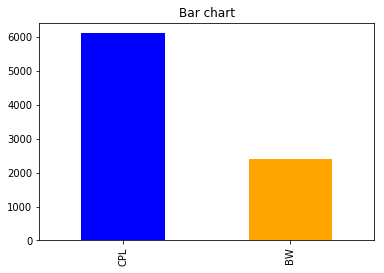

In [249]:
#Visualize the count of email for each class.

count_Class=pd.value_counts(df_final['class'], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

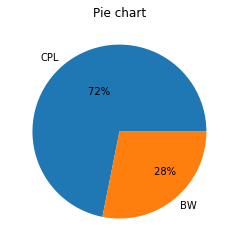

In [250]:
#Visualize count of emails for each clas in pie chart.

count_Class.plot(kind = 'pie',  autopct='%10.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [251]:
#Want to check most frequent words for CPl module
#With the use of Counter function we can count most frequent words in each class.

count1 = Counter(" ".join(df_final[df_final['class']=='CPL']["text"]).split()).most_common(30)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in cpl module", 1 : "count"})
count2 = Counter(" ".join(df_final[df_final['class']=='BW']["text"]).split()).most_common(30)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in BW module", 1 : "count_"})


In [252]:
df1.head()

,words in cpl module,count
0,shell,20719
1,com,20061
2,please,6434
3,subject,5019
4,team,4667


In [253]:
df2.head()

,words in BW module,count_
0,shell,4881
1,com,4507
2,pb,2380
3,please,2367
4,report,2336


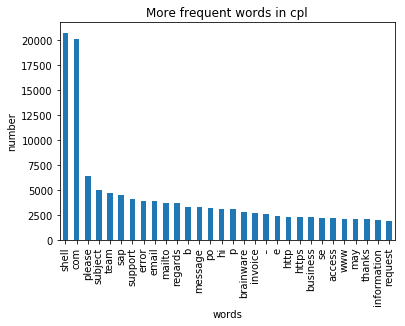

In [254]:
#Visualization for 30 most frequent words in CPL module

df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in cpl module"]))
plt.xticks(y_pos, df1["words in cpl module"])
plt.title('More frequent words in cpl')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


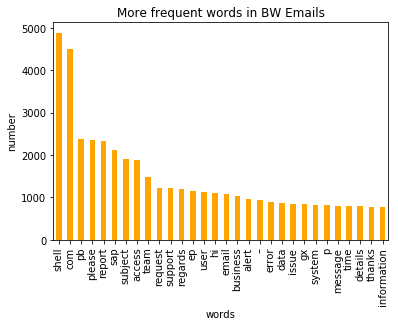

In [255]:
#Visualization 30 most frequent words in BW module.

df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in BW module"]))
plt.xticks(y_pos, df2["words in BW module"])
plt.title('More frequent words in BW Emails')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


#### Formating our df_final dataset to fit in our predictive model.

It seems our df_final DataFrame text looks fine and ready to use in predictive model for email class prediction.

In [256]:
#Collecting X as email body and y as label i.e CPL and BW
X=df_final.text
y=df_final.label
type(X)
type(y)

pandas.core.series.Series

In [257]:
#Check the shape of X and y.

print(X.shape)
print(y.shape)

(8507,)
(8507,)


### Creating train and test dataset.
Train/Test Split involves splitting the dataset into training and
testing sets respectively, which are mutually exclusive. After which, you train with the training
set and test with the testing set. This will provide a more accurate evaluation on out-of-sample
accuracy because the testing dataset is not part of the dataset that have been used to train the data.
It is more realistic for real world problems.
This means that we know the outcome of each data point in this dataset, making it great to test
with! And since this data has not been used to train the model, the model has no knowledge of
the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.

In [258]:
#Importing train_test_split from sklearn.model_selection in process to split dataset into test and train

from sklearn.model_selection  import train_test_split

In [259]:
# Spliting dataset into X_train, X_test,y_train,y_test in ratio 70:30 percent in number of rows.

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

In [260]:
# Check number of rows  in X_train dataset after spliting.

len(X_train)

5954

In [261]:
# Check number of rows  in X_test dataset after spliting.

len(X_test)

2553

In [262]:
# Importing CountVectorizer to count words frequency in data set.

from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [263]:
# Fit the X_train data into vect object.

vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [264]:
# Check the X_train dataset words frequency.

vect.vocabulary_

{'hi': 6712,
 'raise': 12566,
 'ticket': 15672,
 'issue': 7635,
 'using': 16394,
 'oa': 10685,
 'replication': 13027,
 'transaction': 15913,
 'getting': 5935,
 'error': 4898,
 'message': 9639,
 'continues': 3164,
 'transmitted': 15933,
 'ariba': 1008,
 'realm': 12724,
 'cheers': 2609,
 'jude': 8004,
 'galon': 5733,
 'pgs': 11571,
 'process': 12196,
 'expert': 5105,
 'europe': 4997,
 'cp': 3304,
 'systems': 15347,
 'innovation': 7369,
 'shell': 14264,
 'international': 7516,
 'petroleum': 11553,
 'company': 2959,
 'limited': 8801,
 'registered': 12882,
 'england': 4766,
 'wales': 16919,
 'number': 10619,
 'office': 10773,
 'centre': 2471,
 'london': 8953,
 'se': 13962,
 'uk': 16169,
 'receive': 12750,
 'time': 15701,
 'weekend': 17013,
 'obliged': 10707,
 'reply': 13029,
 'immediately': 7108,
 'convenient': 3192,
 'mail': 9181,
 'attachment': 1198,
 'response': 13156,
 'string': 15038,
 'contain': 3142,
 'confidential': 3056,
 'data': 3581,
 'information': 7297,
 'legally': 8683,
 'priv

In [299]:
# Get the features in X_train data set.

len(vect.get_feature_names())

17721

In [266]:
# Now transfomred the X_train and X_test documents to documents-term matrix.

X_train_transformed = vect.transform(X_train)
X_test_transformed =vect.transform(X_test)

In [301]:
#print(X_test_transformed)

Implementing Naive Bayes predictive model for our case to predict class of incoming email.

In [302]:
# importing BernoulliNB package from sklearn.naive_bayes class.

from sklearn.naive_bayes import BernoulliNB

#Defining bernoulli NB object bnb.
bnb = BernoulliNB()

# Fitting the Naive Bayes model into X_train and y_train data set with the use of fit().
bnb.fit(X_train_transformed,y_train)

# NOw predict email class with use for predict().
y_pred_class = bnb.predict(X_test_transformed)

# Sicne Naive Bayes algorithm work on probability hence should find  the probality of predicting email class. 
pred_proba =bnb.predict_proba(X_test_transformed)


## Check the model accuracy 

In [269]:
# Importing metrics package from sklearn library.

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9310614962788876

In [306]:
#y_test

In [270]:
# Predicting the class of emails.

y_pred_class

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [271]:
# To Check how our model working with the use of confusion matrix.

metrics.confusion_matrix(y_test, y_pred_class)

array([[1749,  107],
       [  69,  628]], dtype=int64)

In [272]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1749  107]
 [  69  628]]


In [273]:
# Check True Positive.
TP

628

In [274]:
# Check   True Negative.
TN

1749

In [275]:
# Check False Positive.
FP

107

In [276]:
# Check False Negative.
FN

69

## Now I am testing our Model with random email text from local machine.

Here we will read a excel file from local machine and will do test if our model is working as per our prediction or not.The test.xlsx file has email body and class but we will focus on email body/text only,Because we need to predict class of these emails.

In [376]:
# Reading new excel file from local machine into DataFrame name df_text.

df_text=pd.read_excel("C:\\Users\\quashain.khan\\Desktop\\test.xlsx")

In [377]:
#df_text['Label'] = df_text['Label'].map({'CPL':0, 'BW':1})

In [378]:
# View the top 5 columns of the new DataFrame df_text
df_text.head(10)

,text
0,"Hello Mysap1, I am not abe to create po in my..."
1,"Hello Mysap1, please find the below report I ..."
2,Transaction ME53N is not working properly
3,"unable to find commitment servcie entry, po in..."
4,Lanat hy Qushain par
5,"Hello team , I am looking po report"
6,"Hi Team, Could you please capex report"
7,fetch contract report


In [379]:
# Copying df_text.text into x_test1 pandas series.
x_test1=df_text.text
#y_test1=df_text.Label

In [385]:
# Check the type of x_test1.
#y_test1 

In [381]:
# Now we should transformed into sparse matrix.

X_test_transformed1 =vect.transform(x_test1)
#print(X_test_transformed1)

In [382]:
# NOw we can check the our model prediction for new data set.

y_pred_class1 = bnb.predict(X_test_transformed1)
y_pred_class1


array([0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [383]:
# To check the accuracy of prediction.

metrics.accuracy_score(y_test1, y_pred_class1)

1.0

In [384]:
# To Check how our model working to classify new emails with the use of confusion matrix.

metrics.confusion_matrix(y_test1, y_pred_class1)

array([[4, 0],
       [0, 4]], dtype=int64)